# MATH 210 Project I 

## Interactive Plot Visualization with mpld3 and ipywidgets

### by Matthew Yuen 

mpld3 combines features from Matplotlib and [D3js](https://github.com/d3/d3/wiki), a JavaScript library from creating interactive data visualizations. mpld3 allows the user to create these visualizations using code which can be done within browser on notebooks such as Python. 

Widgets are objects in Python which allow for interactive visualizations in the Jupyter notebook. 

The goal of this project is to demonstrate basic plugins from mpld3 as well as some slider widgets from ipywidgets, thus ultimately providing the user with knowledge how to incorporate these with plots from matplotlib. 

For more information, check out the [mpld3 documentation](http://mpld3.github.io/modules/API.html) or [ipywidgets documentation](http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html).  

## Contents: 

1. Starting Up  
2. Plugins (mpld3) 
    * Tooltip Example
3. Slider from ipywidgets
    * Butterfly Curve 
4. Exercises

## 1. Starting Up

To begin using interactive plots from mpld3, lets import the following: 

In [2]:
import matplotlib.pyplot as plt
import mpld3
%matplotlib inline
mpld3.enable_notebook()

ModuleNotFoundError: No module named 'mpld3'

Now, in addition to creating plots from Matplotlib as before, we can now view interactive plots by using the command `mpld3.display()` 

**Note**: Do not use `mpld3.show()` to render plots as it does not work well in the Python Notebook. Accidentally using this will cause an error to occur with the kernel. If this happens, then you will need to interrupt the kernel to restart. 

mpld3 plugin network allows for many possibilities for adding interactive behaviours to rendered plots. This package has several plugins built-in including zooming and panning. 

** Example 1 ** : Let's view mpld3 in action! Consider this plot of 10 random integers  $r \in [0,10]$.

In [2]:
import numpy as np

In [3]:
r = np.random.randint(10,size=10)
plt.plot(r)
mpld3.display()

We can use mpld3 to interact with this plot. 

Hovering the mouse over brings up a small window in the bottom left corner. Clicking on the middle icon with the four direction arrows allows for panning the plot. Holding and dragging the mouse allows the user to move around the x and y axis. The icon of the magnifying glass allows the user to zoom in to a certain point on the plot. Clicking and dragging allows the user to focus on a certain part of the graph to zoom in. 

Clicking on the house icon returns the plot to its original state. 

## 2. Plugins

A cool thing about mpld3 is being able to add plugins to plots. We already briefly mentioned the three built-ins above; reset, panning, zooming. The ability to create your own custom plugins require some knowledge of both Python and Javascript. For simplicity of this project, I will refer to plugins from [here](http://mpld3.github.io/notebooks/index.html#notebook-examples) for reference and examples presented in this project. 

Now let's introduce another basic plugin called `plugins.pointlabeltooltip` which adds HTML annotations to data plots. First we will need to import `plugins` from mpld3. 

In [3]:
from mpld3 import plugins

** Example 2: ** 

Now let's create a simple scatterplot which has 50 random plots and each plot is a number in the range [0,50] in no particular order. 

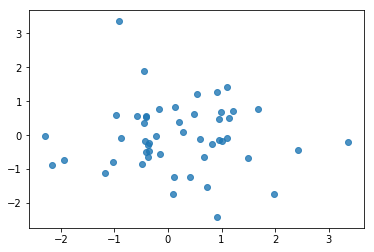

In [4]:
figure, axis = plt.subplots()
N = 50
x = np.random.randn(N)
y = np.random.randn(N)
labels = ['Point {0}'.format(i) for i in range(50)]

points = axis.scatter(x,y,lw=1,alpha=0.8)


tooltip = plugins.PointLabelTooltip(points,labels)

plugins.connect(figure,tooltip)

We can see that as we hover the mouse over the blue dots, we can see that each dot has a Point and a number. We can also use the built-in plugins as mentioned before. 

## 3. Widgets from ipywidgets

There are countless different widgets all in the [ipywidgets documentation](http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html). Basically what happens is that when using widgets, we need to use the `interact` function. This creates a user interface control which allows for exploring code and data interactively.  

To use `interact`, we must define a function that we want to visualize. This function gets passed with an integer argument generating a slider bound to the function parameter. Let's visualize this with a simple example. 

** Example 3 ** : Let's create a simple plot of $f(x) = \sin(x)$ and by using the slider from `widgets`, observe how this plot changes. 

In [4]:
from ipywidgets import widgets 
from ipywidgets import interact

In [15]:
def sin(a):
    x = np.linspace(0,1,100)
    y = np.sin(a*x)
    plt.plot(x,y)
    plt.show();

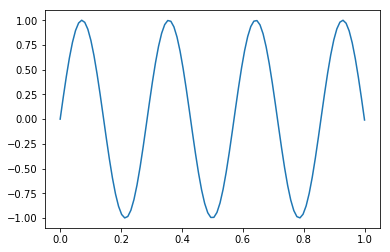

In [17]:
interact(sin,a=widgets.IntSlider(min= 2, max = 30, step = 5))

From Example 3, we can see that by moving the slider a left and right, we are changing the frequency of the function $f(x) = \sin(x)$. Since we have also called `mpld3.enable_notebook()` from Starting Up, we can also use the basic built-in plugins from mpld3 on this plot. 

** Example 4 ** Let's see what happens to the butterfly curve when we add the slider plugin to it. 

The butterfly curve is defined by: 
$$ x = \sin(t)(e^{\cos(t)} - 2\cos(4t) - \sin\left( \frac{1}{12} \right)^5 \, \ \ y = \cos(t)(e^{\cos(t)} - 2\cos(4t) - \sin \left (\frac{1}{12} \right)^5$$

In [18]:
def butterfly(a):
    t = np.linspace(-5,5,100*a)
    x = np.sin(a*t)*(np.exp(np.cos(a*t))-2*np.cos(4*t*a)-np.sin(t*a/12)**5)
    y = np.cos(t*a)*(np.exp(np.cos(t*a))-2*np.cos(4*t*a)-np.sin(t*a/12)**5)
    plt.plot(x,y)
    plt.show()

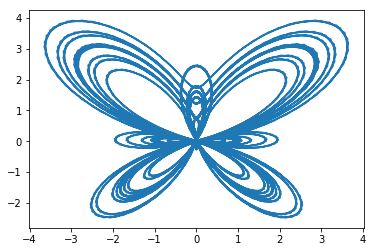

In [22]:
interact(butterfly,a=widgets.IntSlider(min= 1, max = 40, step = 5))

We can see that as we increase the slider to the right, the lines of the butterfly curve gets smoother. 

** Example 5 ** Let's try an example using the slider widget for a 3D graph. For this example we'll only apply the slider to the $y$ variable. 

Consider the following function: 
$$ z = \cos\left(\sqrt{x^2+y^2}\right) \ \text{for} \ \ x,y\in [-4\pi,4\pi]$$

** NOTE !!! ** The 3D plot will not run if mpld3 is imported, so we will need to restart the kernel and not run mpld3. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [5]:
def threeD(a):
    plt.figure()
    ax = plt.axes(projection='3d')
    x = np.linspace(-8*np.pi,8*np.pi,500)
    y = np.linspace(-8*np.pi,8*np.pi,500)
    X, Y = np.meshgrid(x,y)
    Z = np.cos( np.sqrt(X**2 + Y**2*a) )
    ax.plot_surface(X,Y,Z,cmap=plt.cm.winter), ax.set_zlim(bottom=-5,top=5);

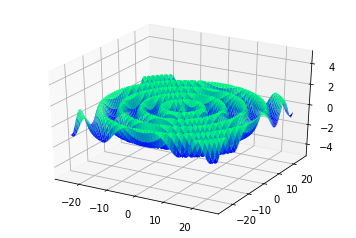

In [6]:
interact(threeD,a=widgets.IntSlider(min= 1, max = 10, step = 2))

## 4. Exercises

** Exercise 1 **  

Let's create a plot of the following functions: 
$$ y_a = \cos(x),  \ \ y_b = \sin(x) , \ \ \text{for} \ \  x \in [-3,3]$$ 

Incorporate a slider with a minimum value of 2 and a maximum value of 10 with step size 0.05. 

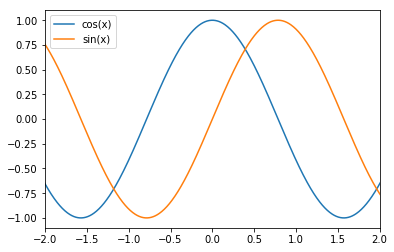

In [18]:
def fun(a):
    x = np.linspace(-3,3,1000)
    ya = np.cos(a*x)
    yb = np.sin(a*x)
    plt.plot(x,ya, label = 'cos(x)')
    plt.plot(x,yb, label = 'sin(x)')
    plt.legend()
    plt.xlim(-2,2)
    plt.ylim(-1.1,1.1);
interact(fun,a=widgets.IntSlider(min= 2, max = 10, step = 0.05))    

** Exercise 2 ** 

Create a slider to change the shape of the following 3D function: 

$$ z = \frac{1}{1+x^2+2y^2} \ \text{for} \ x,y\in[-2,2]$$ 

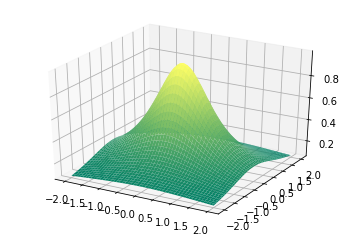

In [27]:
def hill(a):
    plt.figure() 
    ax = plt.axes(projection='3d')
    x_bound = np.linspace(-2,2,100)
    y_bound = np.linspace(-2,2,100)
    x,y = np.meshgrid(x_bound,y_bound)
    z = 1/(1+x**2*a+2*y**2*a)
    ax.plot_surface(x,y,z,cmap=plt.cm.summer)
interact(hill,a=widgets.IntSlider(min=1,max=30,step=2))